In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
gdp_df = pd.read_csv(r"C:\Users\shipm\NSS_Analytics_Jumpstart\DA12\projects\un-python-shipster86\data\gdp_percapita.csv")

In [3]:
#4.	Using the pandas `read_csv()` method, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [4]:
gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN


In [5]:
gdp_df.tail()

,Country or Area,Year,Value,Value Footnotes
7657,Zimbabwe,1994,2670.106615,NaN
7658,Zimbabwe,1993,2458.783255,NaN
7659,Zimbabwe,1992,2468.278257,NaN
7660,Zimbabwe,1991,2781.787843,NaN
7661,Zimbabwe,1990,2704.757299,NaN


In [6]:
#5. How many rows and columns are in `gdp_df`? What are the data types of each column?

In [7]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  7662 non-null   object 
 1   Year             7662 non-null   int64  
 2   Value            7662 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 239.6+ KB


In [8]:
#6. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [9]:
gdp_df= gdp_df.drop(columns=['Value Footnotes'])

In [10]:
gdp_df.head()

,Country or Area,Year,Value
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111


In [11]:
gdp_df = gdp_df.rename(columns={'Country or Area' : 'Country', 'Year': 'Year', 'Value':'GDP_Per_Capita'})

In [12]:
#7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice? 

In [ ]:
#gdp_df.isnull()

In [27]:
#Attempt 1: gdp_df.groupby('Country').nunique()

In [40]:
#unique_gdp = pd.unique(gdp_df['GDP_Per_Capita'])

In [123]:
gdp_df.groupby('Year').nunique('Country')



,Country,GDP_Per_Capita
Year,,
1990,207,206
1991,208,207
1992,210,208
1993,211,209
1994,213,212
1995,223,222
1996,223,222
1997,226,224
1998,226,225


In [32]:
# Attempt 3: gdp_df.nunique(axis=0)

Country            242
Year                33
GDP_Per_Capita    7624
dtype: int64

In [88]:
gdp_df.groupby('Year')['Country'].nunique().sort_values()

Year
1990    207
1991    208
1992    210
1993    211
1994    213
1995    223
1996    223
1997    226
1998    226
1999    227
2022    232
2000    233
2001    234
2002    235
2003    235
2004    236
2005    236
2006    237
2007    237
2008    238
2009    239
2010    239
2012    240
2011    240
2021    241
2013    242
2014    242
2015    242
2016    242
2017    242
2018    242
2019    242
2020    242
Name: Country, dtype: int64

In [14]:
# 8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

In [54]:
gdp_df[gdp_df['Year'] == 2020]

,Country,Year,GDP_Per_Capita
1,Afghanistan,2020,1968.341002
22,Africa Eastern and Southern,2020,3455.023119
55,Africa Western and Central,2020,3957.933804
88,Albania,2020,13278.369769
121,Algeria,2020,10844.770764
...,...,...,...
7503,Viet Nam,2020,10450.622382
7536,West Bank and Gaza,2020,5402.538773
7565,World,2020,16204.169107
7598,Zambia,2020,3183.650773


In [69]:
gdp_df2020 = gdp_df[gdp_df['Year'] == 2020]

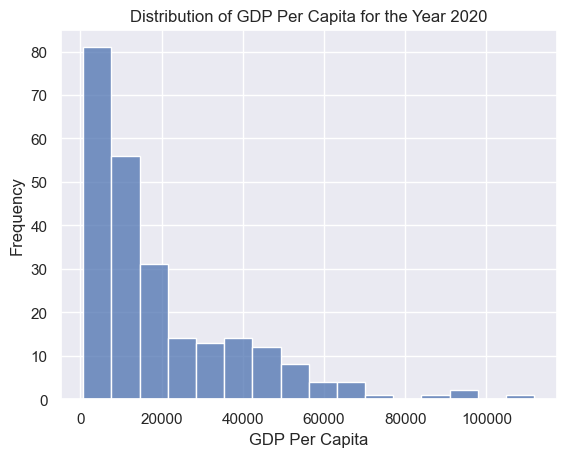

In [72]:
#Seaborn basic histogram
sns.set_theme(style="darkgrid")
sns.histplot(data=gdp_df2020, x="GDP_Per_Capita")
plt.title('Distribution of GDP Per Capita for the Year 2020')
plt.xlabel('GDP Per Capita')
plt.ylabel('Frequency')
plt.show()

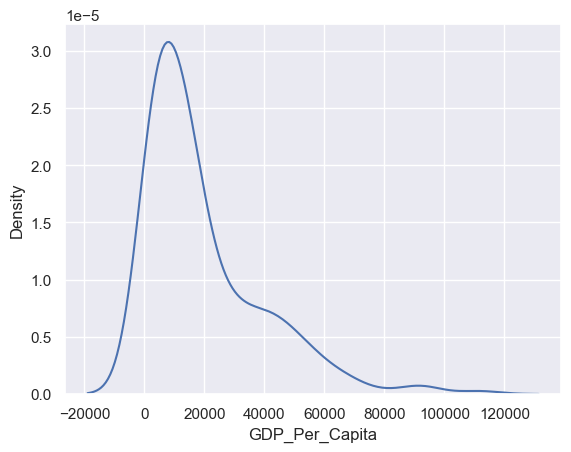

In [73]:
sns.set_theme(style="darkgrid")

 
# Make default density plot
sns.kdeplot(gdp_df2020['GDP_Per_Capita'])
plt.show()

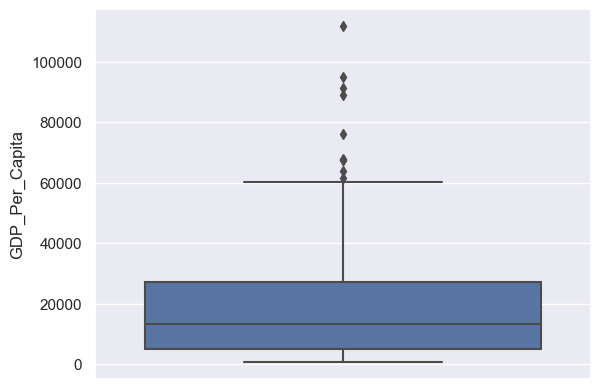

In [76]:
sns.set_theme(style="darkgrid")
sns.boxplot(y=gdp_df2020["GDP_Per_Capita"])
plt.show()

<Axes: xlabel='Country', ylabel='GDP_Per_Capita'>

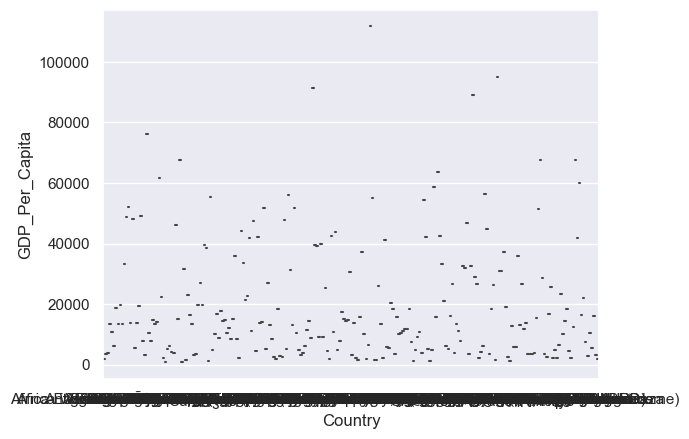

In [79]:
#Seaborn violin plot - not working?
sns.violinplot(x=gdp_df2020["Country"], y=gdp_df2020["GDP_Per_Capita"])

In [91]:
# 9. What was the median GDP per capita value in 2020?
gdp_df[gdp_df['Year'] == 2020]['GDP_Per_Capita'].median()

13357.997573370474

In [16]:
# 10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
# 	* A boxplot
# 	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
# 	* A scatterplot
# 	* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)  
# Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.
 

In [93]:
years_of_interest = [1990, 2000, 2010, 2020]
gdp_decades = gdp_df[gdp_df['Year'].isin(years_of_interest)]

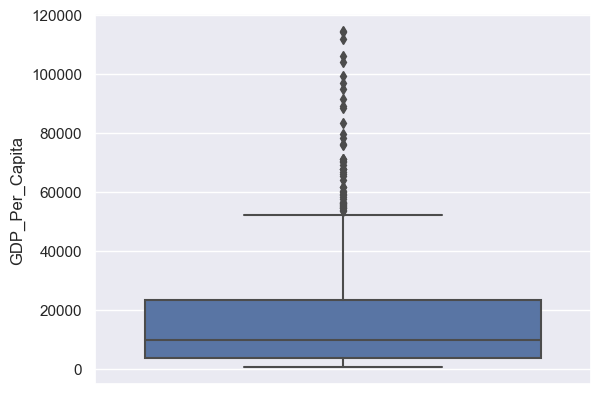

In [94]:
sns.set_theme(style="darkgrid")
sns.boxplot(y=gdp_decades["GDP_Per_Capita"])
plt.show()

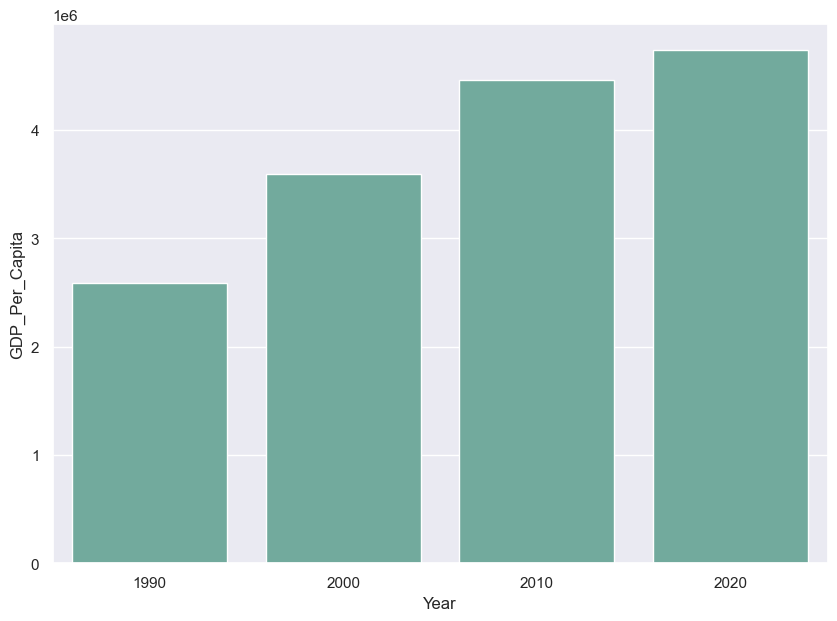

In [98]:
# set plot style: grey grid in the background:
sns.set_theme(style="darkgrid")

# Set the figure size
plt.figure(figsize=(10, 7))

# plot a bar chart
sns.barplot(
    x="Year", 
    y="GDP_Per_Capita", 
    data=gdp_decades, 
    estimator=sum, 
    errorbar=None, 
    color='#69b3a2');

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

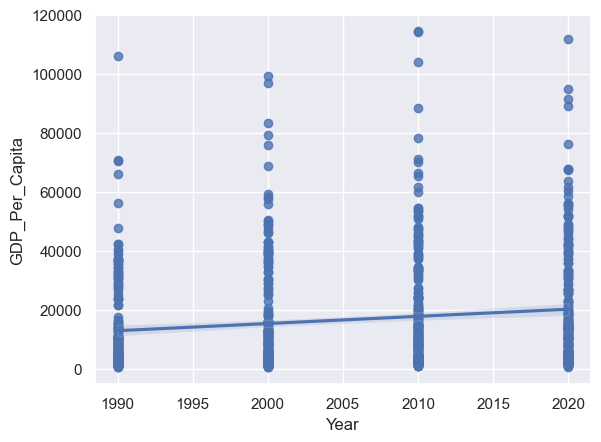

In [103]:
sns.regplot(x=gdp_decades["Year"], y=gdp_decades["GDP_Per_Capita"])

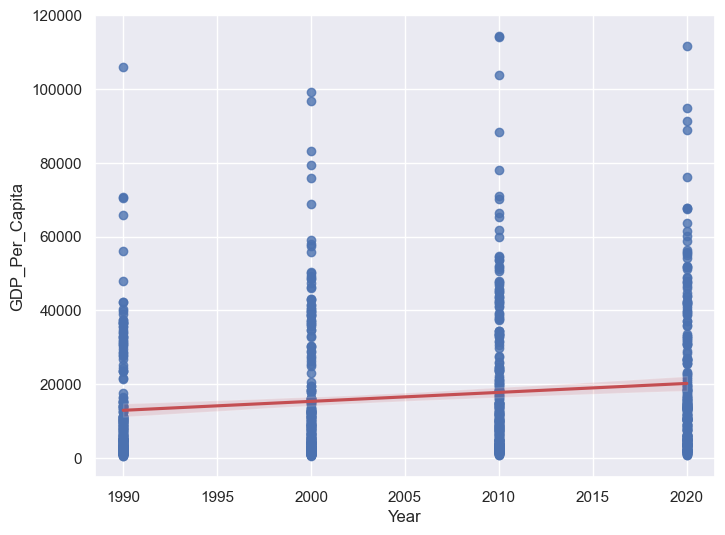

In [104]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.regplot(
    x=gdp_decades["Year"],
    y=gdp_decades["GDP_Per_Capita"],
    line_kws={"color": "r"},
    ax=ax
)
plt.show()

In [106]:
# 11. Which country was the first to have a GDP per capita greater than $100,000?
gdp_df[gdp_df["GDP_Per_Capita"]>100000].sort_values(by='Year')

,Country,Year,GDP_Per_Capita
7302,United Arab Emirates,1990,105893.626059
7301,United Arab Emirates,1991,101048.696239
7295,United Arab Emirates,1997,100956.706467
4167,Luxembourg,2001,101143.147977
4166,Luxembourg,2002,103317.331098
4165,Luxembourg,2003,104743.000088
4164,Luxembourg,2004,107634.837198
4163,Luxembourg,2005,108632.360016
4162,Luxembourg,2006,113346.035782
4161,Luxembourg,2007,120647.822959


In [18]:
# 12. Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

In [108]:
gdp_df[gdp_df['Year'] == 2020].sort_values(by='GDP_Per_Capita', ascending=False)

,Country,Year,GDP_Per_Capita
4148,Luxembourg,2020,111751.314751
6108,Singapore,2020,94910.101431
3279,Ireland,2020,91356.855054
5746,Qatar,2020,89019.069857
681,Bermuda,2020,76117.804744
...,...,...,...
5074,Niger,2020,1214.546556
6273,Somalia,2020,1127.418534
1630,Dem. Rep. Congo,2020,1044.071214
1217,Central African Republic,2020,847.765012


In [111]:
lux = gdp_df[gdp_df['Country'] == 'Luxembourg'].sort_values(by='Year')

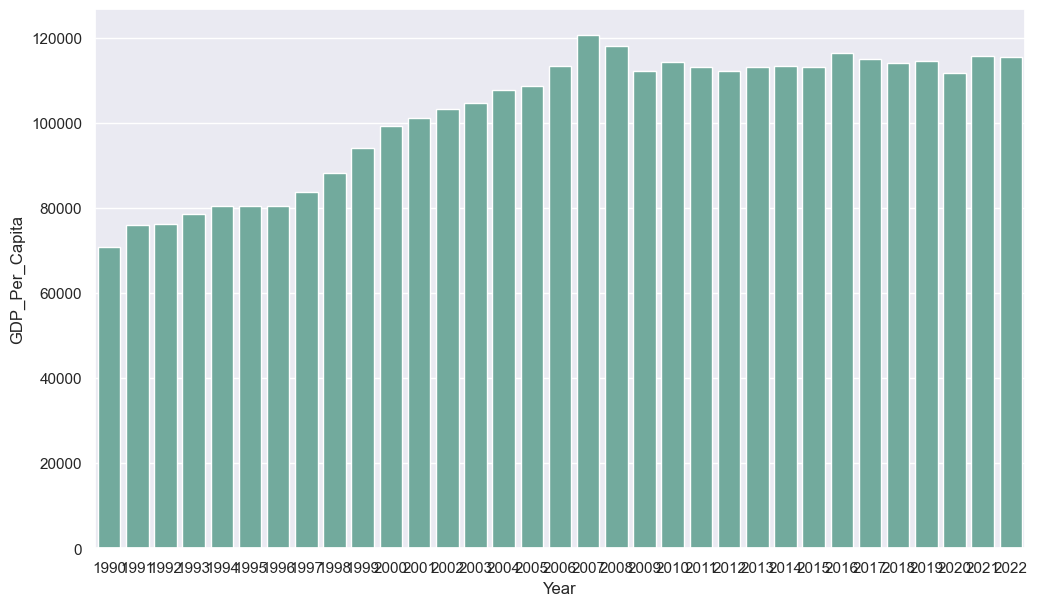

In [114]:
# set plot style: grey grid in the background:
sns.set_theme(style="darkgrid")

# Set the figure size
plt.figure(figsize=(12, 7))

# plot a bar chart
sns.barplot(
    x="Year", 
    y="GDP_Per_Capita", 
    data=lux, 
    estimator=sum, 
    errorbar=None, 
    color='#69b3a2');

In [19]:
# 13. Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. **Bonus question:** Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?

In [115]:
gdp_df[gdp_df['Year'] == 2020].sort_values(by='GDP_Per_Capita')

,Country,Year,GDP_Per_Capita
973,Burundi,2020,711.355263
1217,Central African Republic,2020,847.765012
1630,Dem. Rep. Congo,2020,1044.071214
6273,Somalia,2020,1127.418534
5074,Niger,2020,1214.546556
...,...,...,...
681,Bermuda,2020,76117.804744
5746,Qatar,2020,89019.069857
3279,Ireland,2020,91356.855054
6108,Singapore,2020,94910.101431


In [119]:
bur = gdp_df[gdp_df['Country'] == 'Burundi'].sort_values(by='Year')

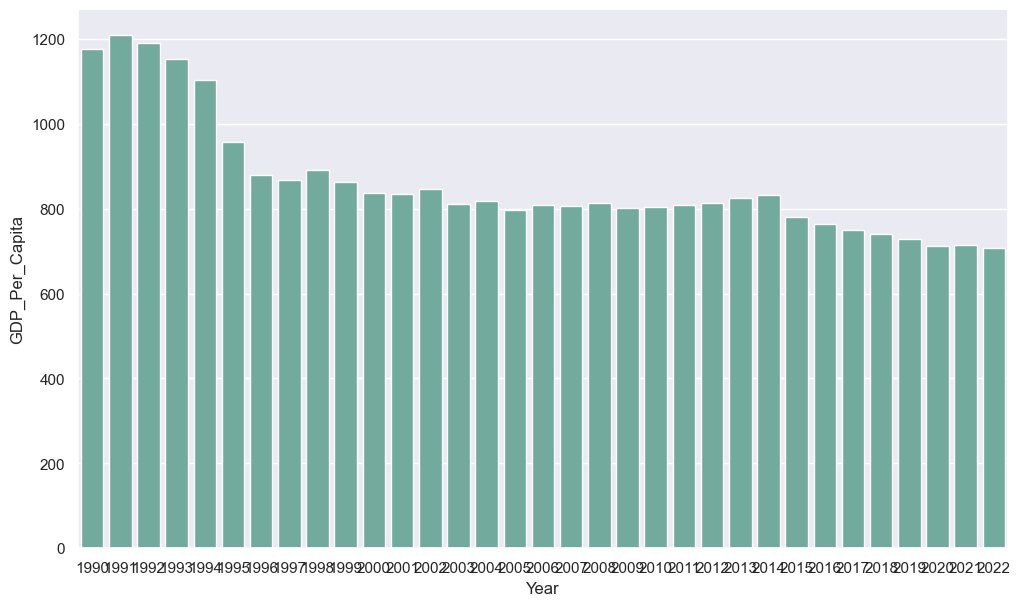

In [120]:
# set plot style: grey grid in the background:
sns.set_theme(style="darkgrid")

# Set the figure size
plt.figure(figsize=(12, 7))

# plot a bar chart
sns.barplot(
    x="Year", 
    y="GDP_Per_Capita", 
    data=bur, 
    estimator=sum, 
    errorbar=None, 
    color='#69b3a2');

In [20]:
# 14. Read in the internet use dataset into a DataFrame named `internet_df`. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.

In [21]:
# 15. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.

In [22]:
# 16. Look at the number of observations in this dataset per year. What do you notice?

In [ ]:
#17. What is the first year to have a non-zero internet users percentage value?

In [ ]:
# 18. How does the distribution of internet users percent differ for 2000 and 2014?


In [ ]:
# 19. For how many countries was the percentage of internet users below 5% in 2014?

In [ ]:
# 20. Merge the two DataFrames to one. Do this in a way that keeps **all rows** from each of the two DataFrames. Call the new DataFrame `gdp_and_internet_use`. Look at the first and last few rows to confirm that it merged correctly.


In [ ]:
# 21. Find the three countries with the highest internet users percentage in 2014. Use a seaborn FacetGrid (https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) to compare how the GDP per capita has changed over time for these three countries. What do you notice?


In [ ]:
# 22. Subset `gdp_and_internet_use` to just the year 2014. Save this as a new dataframe named `gdp_and_internet_use_2014`.


In [ ]:
# 23. Create a plot which compares Internet Users Percentage and GDP per Capita for the year 2014. What do you notice from this plot? If you see any unusual points, investigate them.


In [ ]:
# 24. **Stretch Question:** Use the `qcut` function from pandas (https://pandas.pydata.org/docs/reference/api/pandas.qcut.html) to divide countries in `gdp_per_capita_2014` into three groups based on their GDP per capita values. Label these groups as "Low", "Medium", and "High". Put these labels in a new column, named "GDP_group".



In [ ]:
# 25. **Stretch Question:** How does the median internet users percentage compare for the three gdp groups?



In [ ]:
# ### Bonus exercise:
# 1.    Download another data set from the UN data (http://data.un.org/Explorer.aspx) to merge with your data and explore.
